# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Data Visualization

In [8]:
iris = pd.read_csv("Iris.csv")
print(iris.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [9]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


Show number of Rows and Columns

In [10]:
iris.shape

(150, 6)

In [13]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [14]:
print("Target Labels", iris["Species"].unique())

Target Labels ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Correlation

In [15]:
corr=iris.corr()
corr


<ipython-input-15-943091a04634>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


Heat Map

<ipython-input-16-7cc2851e7f28>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(), annot = True, cmap = "Oranges_r")


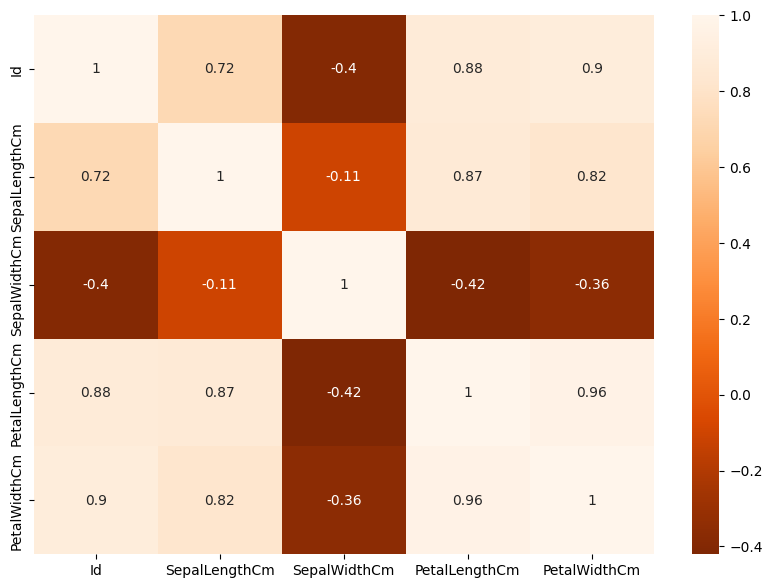

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(iris.corr(), annot = True, cmap = "Oranges_r")
plt.show()

Line Chart

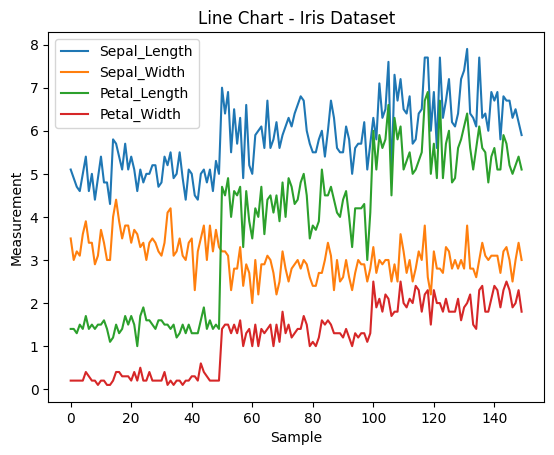

In [19]:
plt.plot(iris['SepalLengthCm'], label='Sepal_Length')
plt.plot(iris['SepalWidthCm'], label='Sepal_Width')
plt.plot(iris['PetalLengthCm'], label='Petal_Length')
plt.plot(iris['PetalWidthCm'], label='Petal_Width')

plt.xlabel('Sample')
plt.ylabel('Measurement')
plt.title('Line Chart - Iris Dataset')

plt.legend()

plt.show()

Box Plot

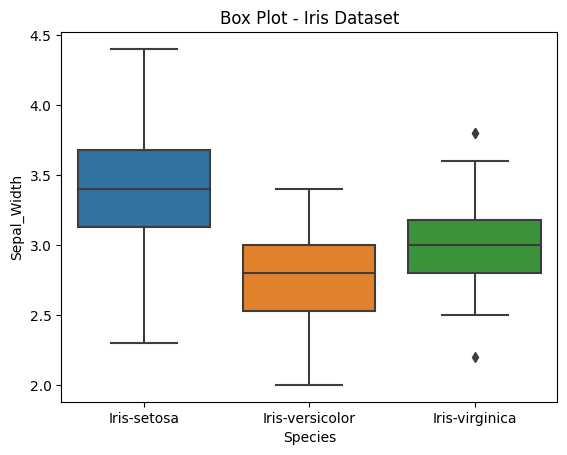

In [20]:
sns.boxplot(x='Species', y='SepalWidthCm', data=iris)

plt.xlabel('Species')
plt.ylabel('Sepal_Width')
plt.title('Box Plot - Iris Dataset')

plt.show()

Strip Plot

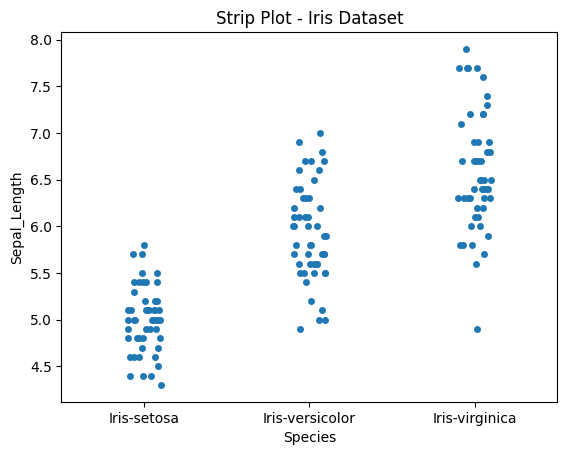

In [23]:
sns.stripplot(x='Species', y='SepalLengthCm',data=iris)

plt.xlabel('Species')
plt.ylabel('Sepal_Length')
plt.title('Strip Plot - Iris Dataset')

plt.show()

Joint Plot -  Sepal Length vs Sepal Width

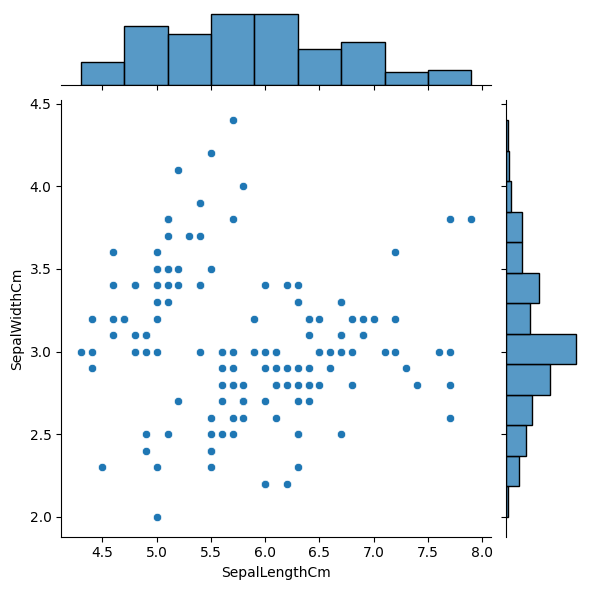

In [24]:
sns.jointplot(data=iris, x='SepalLengthCm', y='SepalWidthCm')

plt.show()

Joint Plot - Petal Length vs Petal Width

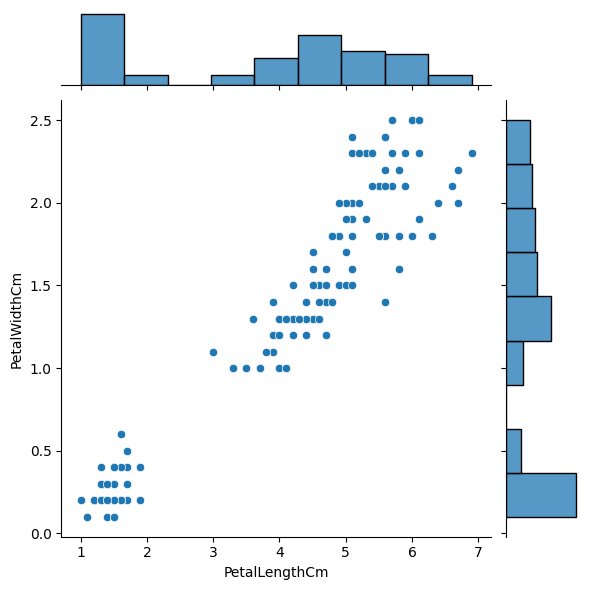

In [25]:
sns.jointplot(data=iris, x='PetalLengthCm', y='PetalWidthCm')

plt.show()

In [26]:
import plotly.express as px
fig = px.scatter(iris, x="SepalLengthCm", y="SepalWidthCm", color="Species")

In [27]:
fig.show()

In [28]:
iris = iris.iloc[: , 1:]
x = iris.drop("Species", axis=1)
y = iris["Species"]

# Creating The Model

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier


In [33]:
k1=5
knn=KNeighborsClassifier(k1)


In [35]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
y_pred=knn.predict(x_test)


In [37]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [38]:
acc = metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy Score :")
acc

Accuracy Score :


96.66666666666667

In [39]:
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Logistic Regression

In [40]:
lr = LogisticRegression()

In [42]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [43]:
y1_pred = lr.predict(x_test)

In [44]:
cm = metrics.confusion_matrix(y_test, y1_pred)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [45]:
acc = metrics.accuracy_score(y_test, y1_pred)*100
print("Accuracy Score :")
acc

Accuracy Score :


100.0

In [46]:
print("Classification Report :")
print(metrics.classification_report(y_test, y1_pred))

Classification Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Random Forest

In [47]:
rf = RandomForestClassifier()

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
Y2_Pred = rf.predict(x_test)

In [50]:
cm = metrics.confusion_matrix(y_test, Y2_Pred)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [51]:
acc = metrics.accuracy_score(y_test, Y2_Pred)*100
print("Accuracy Score :")
acc

Accuracy Score :


100.0

In [52]:
print("Classification Report :")
print(metrics.classification_report(y_test, Y2_Pred))

Classification Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Decision Tree

In [53]:
dtc = DecisionTreeClassifier()

In [54]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [55]:
y3_Pred = dtc.predict(x_test)

In [56]:
cm = metrics.confusion_matrix(y_test, y3_Pred)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [57]:
acc = metrics.accuracy_score(y_test, y3_Pred)*100
print("Accuracy Score :")
acc

Accuracy Score :


100.0

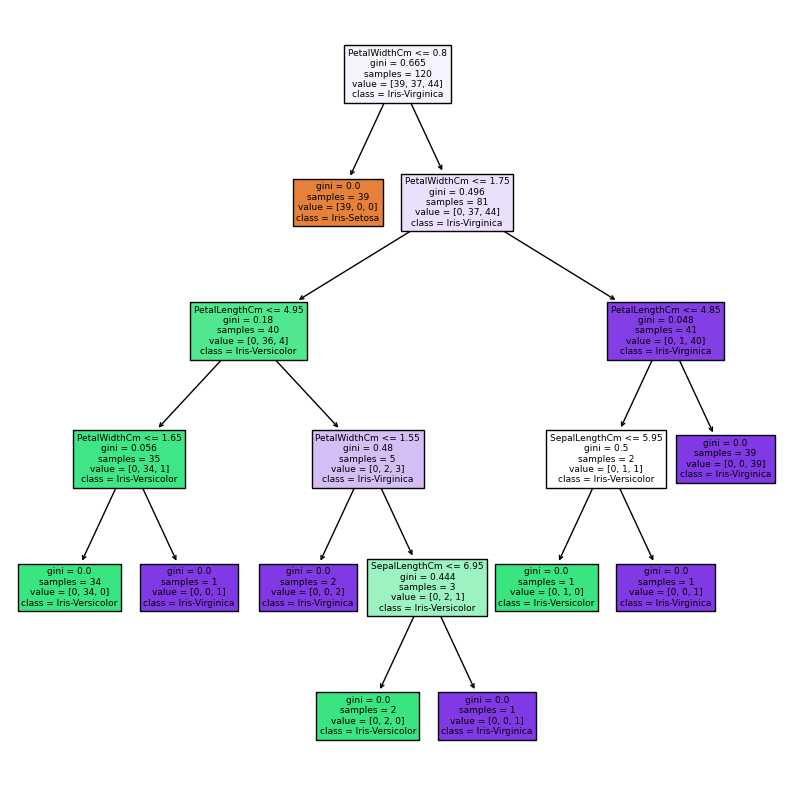

In [58]:
from sklearn.tree import plot_tree
feature = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
classes = ["Iris-Setosa", "Iris-Versicolor", "Iris-Virginica"]
plt.figure(figsize=(10,10))
plot_tree(dtc, feature_names = feature, class_names = classes, filled = True);

SVM

In [59]:
svc = SVC()

In [60]:
svc.fit(x_train, y_train)

SVC()

In [61]:
y_PRed = svc.predict(x_test)

In [62]:
cm = metrics.confusion_matrix(y_test, y_PRed)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Naive Bayes Classifier

In [63]:
nb = GaussianNB()

In [64]:
nb.fit(x_train, y_train)

GaussianNB()

In [65]:
y_prEd = nb.predict(x_test)

In [66]:
cm = metrics.confusion_matrix(y_test, y_prEd)
print("Confusion Matrix :")
cm

Confusion Matrix :


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1,  5]])

In [67]:
cc = metrics.accuracy_score(y_test, y_prEd)*100
print("Accuracy Score :")
acc

Accuracy Score :


100.0

# User Input Of Data

In [70]:
x_new = np.array([[2, 5.0, 5, 0.9]])
prediction = knn.predict(x_new)
print("The given set of values indicate it falls under: {}".format(prediction))

The given set of values indicate it falls under: ['Iris-versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

